# Predictive Model for Fraud Detection
### Financial analytics
*By: Xavier Torres*

![Fraud_img](https://raw.githubusercontent.com/torresxavier/Resources/master/fraud_prev.jpeg)

We are going to load a dataset with **28 variables** describing the transaction (name of variables have been anonymized due to data protection policies), and two other variables describing the **amount** of the transaction and the transaction **class: 0 if this is a regular transaction and 1 if this is labelled as a fraud**.

## Load libraries and first dataset exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Good, no nulls in our dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

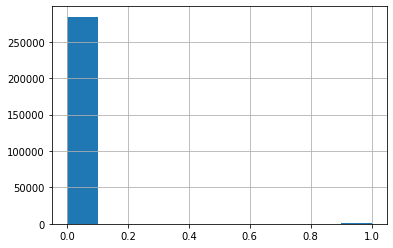

In [7]:
df['Class'].hist()

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

We have a very unbalanced dataset for target variable **Class**

In [9]:
df.groupby('Class').mean()['Amount']

Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64

We note that transaccions with fraud have a mean of Amount of almost 50% 

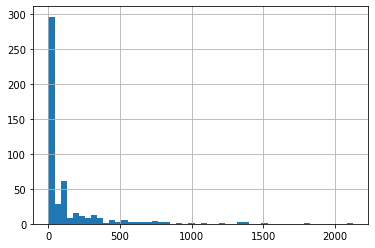

In [10]:
df[df['Class'] == 1]['Amount'].hist(bins=50)

Let's check distributions of amount for each class. Remember that 0 class equals 'No fraud' and 1 Class equals 'Fraud'.

Class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Amount, dtype: object

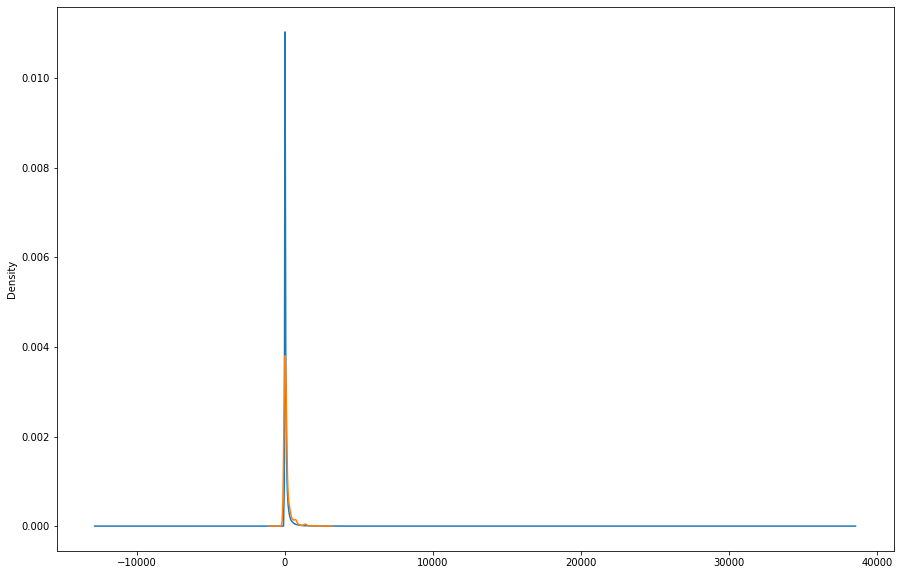

In [11]:
df.groupby("Class").Amount.plot(kind='kde', figsize=(15,10))

We note density for class 1 is pretty higher in lower values. Let's make some other comparisons to verify that:

In [12]:
df.groupby("Class").Amount.describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


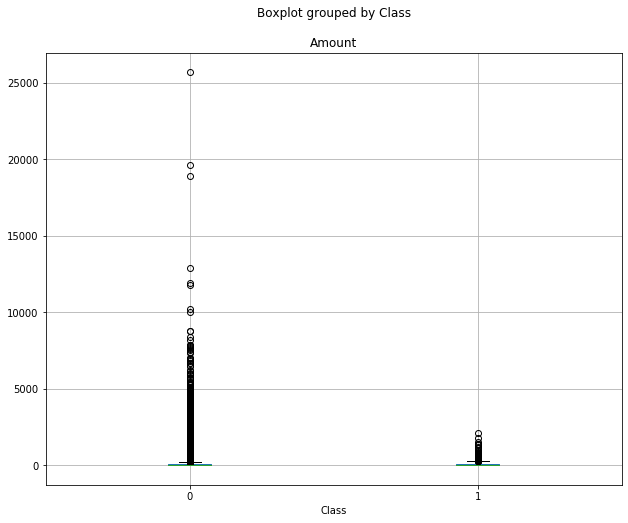

In [13]:
df.boxplot(by="Class", column = "Amount", figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018358D61F08>]],
      dtype=object)

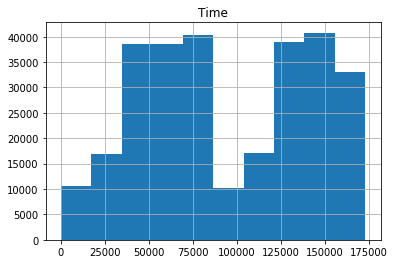

In [14]:
#Let's check the time now. Note that Time is computed in seconds
df.hist(column="Time")

Let's split our dataframe in two datasets to analyze them, depending on its class.

In [15]:
fraud=df[df["Class"]==1]

In [16]:
no_fraud=df[df["Class"]==0]

In [17]:
print("Fraud Cases:{}".format(len(fraud)))
print("No Fraud Cases:{}".format(len(no_fraud)))

Fraud Cases:492
No Fraud Cases:284315


In [18]:
print("% Percentage of cases: {}%".format(round(len(fraud)/len(df)*100,2)))

% Percentage of cases: 0.17%


Let's try to delete outliers to have a more robust model. Let's first be careful and not delete rows that have fraud

In [19]:
#Number of rows with amount higuer that 2500 and not being a fraud
df[(df["Amount"]>2500) & (df["Class"]==0)].shape[0]

440

In [20]:
df.drop(df[(df["Amount"]>2500) & (df["Class"]==0)].index, axis=0, inplace=True)

In [21]:
df.shape

(284367, 31)

We have all variables except the amount scaled. Let's then apply MinMaxScaler to the Amount in order not to influence or bias our regression algorithm.

In [22]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

minMaxResult=MinMaxScaler()

In [23]:
df['Amount'] = minMaxResult.fit_transform(df['Amount'].values.reshape(-1,1))

In [24]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.059848,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.001076,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.151464,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.049400,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.027996,0


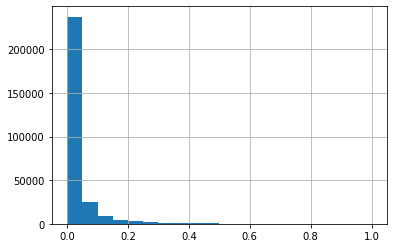

In [25]:
#Let's check results of MinMax  scaling
df['Amount'].hist(bins=20)

In [26]:
# Before modelling, let's drop the time feature because it does not influence in fraud (in our example)
df.drop("Time", axis =1, inplace = True)

## Modeling

Splitting first between train and test split

In [27]:
X = df.drop(['Class'],axis=1) # INDEPENDENT VARIABLES
y = df[['Class']] #  VARIABLE TO PREDICT

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

In [28]:
y_train[y_train["Class"]==1].shape[0]

323

- **Approach 1: Linear Regression model**

In [29]:
# instanciating linear regression model
lr = LogisticRegression(solver="liblinear")

# training the model
lr.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# making predictions
y_pred_lr = lr.predict(X_test)

In [31]:
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

- **Approach 2: Random Forest Classifier**

In [32]:
# instanciating random forest classifier
rfc = RandomForestClassifier(n_estimators = 10)

# training the model
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
# making predictions
y_pred_rfc = rfc.predict(X_test)

### Let's take a look to the scores and confusion matrix of predicted versus observed values

For approach 1, Linear Regression:

In [34]:
# Checking accuracy, precision and recall. 
#TP= True Positive, FP= False Positive, TN = True Negative, FN = False Negative

accuracy = accuracy_score (y_test, y_pred_lr)  # (TP + TN) / (TP+TN+FP+FN)
print("Accuracy of the model = {}".format(round(accuracy,3)))

precision = precision_score(y_test, y_pred_lr) # (TP)/(TP+FP)
print("Precision of the model = {}".format(round(precision,3)))


recall = recall_score(y_test, y_pred_lr) # (TP)/(TP+FN)
print("Recall of the model = {}".format(round(recall,3)))

Accuracy of the model = 0.999
Precision of the model = 0.897
Recall of the model = 0.669


In [35]:
#f1 score (harmonic mean of precision and recall = 2* (precision*recall)/(precision+recall))
f1 = f1_score(y_test, y_pred_lr) 
print("f1 score of the model = {}".format(round(f1,3)))

f1 score of the model = 0.766


In [36]:
#Confusion matrix for lr model
cf_matrix = confusion_matrix(y_pred_lr, y_test, labels=[1,0])
cf_matrix

array([[  113,    13],
       [   56, 85129]], dtype=int64)

Text(0.5, 1, 'Linear Regression')

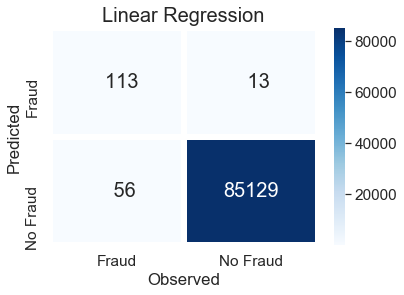

In [37]:
sns.set(font_scale = 1.4)
ax=sns.heatmap(cf_matrix, cmap = "Blues", annot = True, linewidth = 5, fmt = "5", annot_kws={"size": 20})
ax.set_ylim(2,0)
ax.set(xlabel = "Observed", ylabel = "Predicted")
ax.xaxis.set_ticklabels(["Fraud", "No Fraud"])
ax.yaxis.set_ticklabels(["Fraud", "No Fraud"])
ax.set_title("Linear Regression", fontsize = 20)

We see that we have almost a third of frauds are not detected (high False Negative Rate). so we don't have a very good model up to now. Problem of the model? Problem of having unbalanced classes? Let's see...

Now that we have created this previus steps to check the model performance, we will build a function so that we can later reproduce this steps with Random Forest Classifier or other models.

In [38]:
def show_model_results(model_name, y_pred, y_test):
    #Confusion matrix 
    cf_matrix = confusion_matrix(y_pred, y_test, labels=[1,0])
    cf_matrix
    
    #plot Confusion matrix 
    plt.figure().suptitle(model_name, fontsize=20)
    sns.set(font_scale=1.4)
    ax=sns.heatmap(cf_matrix,cmap='Blues', annot=True, linewidths=5,fmt="g", annot_kws={"size": 20}) # font size
    ax.set_ylim(2.0, 0)
    ax.set(xlabel='real', ylabel='predicted')
    ax.xaxis.set_ticklabels(['fraud', 'no fraud']); ax.yaxis.set_ticklabels(['fraud', 'no fraud'])
    
    
    # Checking accuracy, precision and recall. 
    #TP= True Positive, FP= False Positive, TN = True Negative, FN = False Negative

    print("__________________________________________________________")
    print("PERFORMANCE OF MODEL = {}".format(model_name))
    print("__________________________________________________________")
    
    accuracy = accuracy_score (y_test, y_pred)  # (TP + TN) / (TP+TN+FP+FN)
    print("Accuracy of the model = {}".format(round(accuracy,3)))

    precision = precision_score(y_test, y_pred) # (TP)/(TP+FP)
    print("Precision of the model = {}".format(round(precision,3)))


    recall = recall_score(y_test, y_pred) # (TP)/(TP+FN)
    print("Recall of the model = {}".format(round(recall,3)))
    
    #f1 score (harmonic mean of precision and recall = 2* (precision*recall)/(precision+recall))
    f1 = f1_score(y_test, y_pred) 
    print("f1 score of the model = {}".format(round(f1,3)))
    
    return

__________________________________________________________
PERFORMANCE OF MODEL = Linear Regression
__________________________________________________________
Accuracy of the model = 0.999
Precision of the model = 0.897
Recall of the model = 0.669
f1 score of the model = 0.766


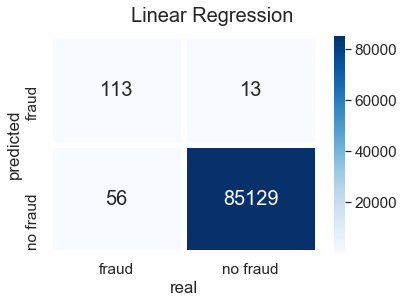

In [39]:
show_model_results("Linear Regression", y_pred_lr, y_test)

__________________________________________________________
PERFORMANCE OF MODEL = Random Forest Classifier
__________________________________________________________
Accuracy of the model = 0.999
Precision of the model = 0.921
Recall of the model = 0.763
f1 score of the model = 0.835


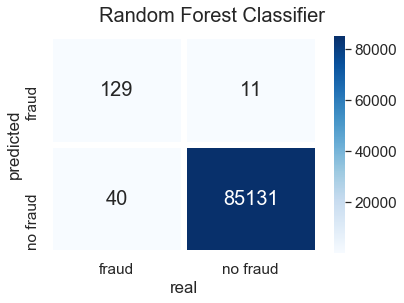

In [40]:
show_model_results("Random Forest Classifier", y_pred_rfc, y_test)

### <span style="color:brown"> We definitely have a problem of unbalanced classes. Let's fix it with oversampling and undersampling </span>

### UNDERSAMPLING
 
 Let's downsize class 0 to the size of class 1, so that we have the same amount of rows belonging to these classes

In [41]:
df2=df.sample(frac=1) #making a copy of original dataset withaleatory resampling

In [42]:
fraud2 = df2[df2["Class"]==1]
fraud2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
212644,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,-6.564659,...,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,0.291164,1
254344,-0.129778,0.141547,-0.894702,-0.457662,0.810608,-0.504723,1.373588,-0.209476,0.208494,-1.613618,...,-0.032643,-0.246526,0.484108,0.359637,-0.435972,-0.248480,0.021527,0.109192,0.074844,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.023600,1
18472,-1.060676,2.608579,-2.971679,4.360089,3.738853,-2.728395,1.987616,-0.357345,-2.757535,-2.335933,...,-0.063168,-0.207385,-0.183261,-0.103679,0.896178,0.407387,-0.130918,0.192177,0.000272,1
72757,-2.986466,-0.000891,0.605887,0.338338,0.685448,-1.581954,0.504206,-0.233403,0.636768,1.010291,...,-0.875146,-0.509849,1.313918,0.355065,0.448552,0.193490,1.214588,-0.013923,0.000716,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42549,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,-6.167234,-11.435624,...,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,0.035292,1
43773,-3.240187,2.978122,-4.162314,3.869124,-3.645256,-0.126271,-4.744730,-0.065331,-2.168366,-4.758304,...,2.601441,0.231910,-0.036490,0.042640,-0.438330,-0.125821,0.421300,0.003146,0.068928,1
213116,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,-4.250717,...,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,0.003320,1
143334,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,-8.409665,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.000000,1


In [43]:
no_fraud2 = df2[df2["Class"]==0][:492]
no_fraud2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
276987,-3.986497,2.595507,0.550910,4.056010,-1.069549,1.907922,-1.604947,1.798305,-0.946212,2.724820,...,0.038784,0.192090,-0.005699,0.186252,0.058579,0.238317,-1.712886,-0.510650,0.009408,0
241296,2.062295,-0.153437,-2.085405,0.169503,0.412698,-1.141236,0.525379,-0.321716,0.157322,0.358457,...,0.121262,0.409499,-0.078533,-0.283278,0.308995,0.830403,-0.139295,-0.099637,0.009160,0
4189,1.304989,-0.441610,0.795409,-0.418427,-1.059743,-0.713620,-0.703108,-0.146676,0.523556,0.194006,...,-0.188056,-0.442504,0.202965,0.318567,0.073723,-0.511895,-0.005318,0.019101,0.011516,0
7530,-1.344960,1.607285,2.502459,2.767967,-0.093336,0.586971,0.167595,0.084712,0.925116,1.500307,...,-0.364552,-0.282218,-0.027845,-0.050605,-0.013547,0.139674,0.486625,0.168689,0.008268,0
280453,-0.195701,0.931604,0.171368,-0.621118,0.276541,-1.197208,0.892256,-0.125743,0.335812,-0.061291,...,-0.306138,-0.693874,0.088215,0.002665,-0.482342,0.146737,0.348811,0.154072,0.000516,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157665,-2.460430,-2.172369,4.187811,5.820266,2.182047,0.161296,-2.794314,0.581976,1.223488,0.958483,...,0.150043,0.474159,0.149608,0.030488,0.189485,0.587961,-0.095825,-0.059485,0.000024,0
255583,-1.471530,2.270315,-2.164849,-1.144598,0.415464,-1.513125,0.630797,0.838206,-0.677182,-0.563171,...,0.313367,0.861210,-0.050977,0.802230,-0.077747,0.068223,0.235852,0.202470,0.000584,0
127806,1.066594,0.018446,0.479158,1.419274,-0.490852,-0.452841,0.053976,0.010562,0.131343,0.090405,...,-0.046824,-0.104716,-0.108169,0.525026,0.636720,-0.374057,0.006815,0.017088,0.020600,0
117182,-0.704058,1.353796,0.975942,0.822890,-0.297220,-0.660884,0.292827,0.476587,-0.882298,-0.053545,...,0.207373,0.575584,-0.096018,0.532026,-0.251183,-0.342894,0.286108,0.151363,0.001412,0


In [44]:
df_downsampling = pd.concat([fraud2, no_fraud2])

In [45]:
df_downsampling 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
212644,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,-6.564659,...,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,0.291164,1
254344,-0.129778,0.141547,-0.894702,-0.457662,0.810608,-0.504723,1.373588,-0.209476,0.208494,-1.613618,...,-0.032643,-0.246526,0.484108,0.359637,-0.435972,-0.248480,0.021527,0.109192,0.074844,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.023600,1
18472,-1.060676,2.608579,-2.971679,4.360089,3.738853,-2.728395,1.987616,-0.357345,-2.757535,-2.335933,...,-0.063168,-0.207385,-0.183261,-0.103679,0.896178,0.407387,-0.130918,0.192177,0.000272,1
72757,-2.986466,-0.000891,0.605887,0.338338,0.685448,-1.581954,0.504206,-0.233403,0.636768,1.010291,...,-0.875146,-0.509849,1.313918,0.355065,0.448552,0.193490,1.214588,-0.013923,0.000716,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157665,-2.460430,-2.172369,4.187811,5.820266,2.182047,0.161296,-2.794314,0.581976,1.223488,0.958483,...,0.150043,0.474159,0.149608,0.030488,0.189485,0.587961,-0.095825,-0.059485,0.000024,0
255583,-1.471530,2.270315,-2.164849,-1.144598,0.415464,-1.513125,0.630797,0.838206,-0.677182,-0.563171,...,0.313367,0.861210,-0.050977,0.802230,-0.077747,0.068223,0.235852,0.202470,0.000584,0
127806,1.066594,0.018446,0.479158,1.419274,-0.490852,-0.452841,0.053976,0.010562,0.131343,0.090405,...,-0.046824,-0.104716,-0.108169,0.525026,0.636720,-0.374057,0.006815,0.017088,0.020600,0
117182,-0.704058,1.353796,0.975942,0.822890,-0.297220,-0.660884,0.292827,0.476587,-0.882298,-0.053545,...,0.207373,0.575584,-0.096018,0.532026,-0.251183,-0.342894,0.286108,0.151363,0.001412,0


In [46]:
df_downsampling.sample(frac=1, random_state=42) 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
283327,1.988341,0.020694,-1.752471,1.222388,0.487394,-0.672546,0.435849,-0.160482,0.213028,0.471198,...,0.067161,0.285980,-0.043918,-0.434583,0.412345,-0.482106,-0.031572,-0.077328,0.007444,0
46918,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,-7.781353,...,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,0.259200,1
179985,2.022765,0.076045,-2.470272,0.101445,1.317935,-0.319378,0.792406,-0.275279,-0.206143,0.075921,...,0.346508,1.338432,-0.086326,-0.898992,0.409992,1.114642,-0.089038,-0.108232,0.000800,0
249607,-7.381547,-7.449015,-4.696287,3.728439,6.198304,-6.406267,-5.831452,1.457175,-0.646203,-4.029129,...,1.176575,-0.978692,-0.278330,-0.635874,0.123539,0.404729,0.704915,-1.229992,0.014000,1
145800,-0.419820,-1.155978,-2.092516,2.786750,0.736297,-0.167292,1.600027,-0.117427,-0.796954,-0.133950,...,0.480640,0.533517,1.284645,0.516131,-0.602941,-0.305024,-0.021363,0.129096,0.180508,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149522,-3.951209,2.881805,-6.421490,2.434181,-1.327325,-2.122106,-3.227533,-0.685560,0.775985,-4.723092,...,1.410479,0.279403,0.570821,0.656271,-0.298601,-0.407571,-1.378703,1.379130,0.021076,1
192382,0.753356,2.284988,-5.164492,3.831112,-0.073622,-1.316596,-1.855495,0.831079,-1.567514,-3.224559,...,0.382007,0.033958,0.187697,0.358433,-0.488934,-0.258802,0.296145,-0.047174,0.000800,1
278612,-0.183297,0.984150,0.175757,-0.642629,0.330315,-1.079659,0.926997,-0.126624,0.260810,-0.087032,...,-0.294584,-0.632163,0.090065,-0.044704,-0.480196,0.150614,0.352416,0.154441,0.000396,0
153835,-22.341889,15.536133,-22.865228,7.043374,-14.183129,-0.463145,-28.215112,-14.607791,-9.481456,-20.949192,...,-9.110423,4.158895,1.412928,0.382801,0.447154,-0.632816,-4.380154,-0.467863,0.000400,1


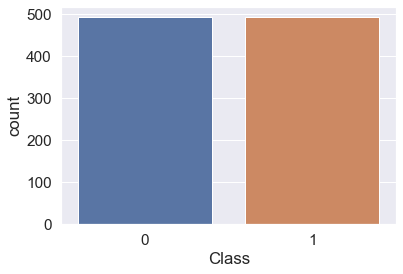

In [47]:
sns.countplot("Class", data = df_downsampling)

We have now balanced classes, so let's apply again our previusly defined models

In [48]:
X2 = df_downsampling.drop(['Class'],axis=1) # INDEPENDENT VARIABLES
y2 = df_downsampling[['Class']] #  VARIABLE TO PREDICT

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3, random_state=23)

In [49]:
# instanciating linear regression model
lr2 = LogisticRegression(solver="liblinear")

# training the model
lr2.fit(X_train2, y_train2.values.ravel())

# making predictions
y_pred_lr2 = lr2.predict(X_test) #using original X_test to predict

In [50]:
# instanciating random forest classifier
rfc2 = RandomForestClassifier(n_estimators = 10)

# training the model
rfc2.fit(X_train2, y_train2.values.ravel())

# making predictions
y_pred_rfc2 = rfc2.predict(X_test) #using original X_test to predict

__________________________________________________________
PERFORMANCE OF MODEL = Linear Regression
__________________________________________________________
Accuracy of the model = 0.964
Precision of the model = 0.049
Recall of the model = 0.935
f1 score of the model = 0.093


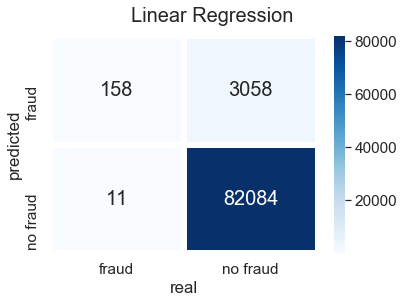

In [51]:
show_model_results("Linear Regression", y_pred_lr2, y_test)

__________________________________________________________
PERFORMANCE OF MODEL = Random Forest Classifier
__________________________________________________________
Accuracy of the model = 0.972
Precision of the model = 0.064
Recall of the model = 0.959
f1 score of the model = 0.12


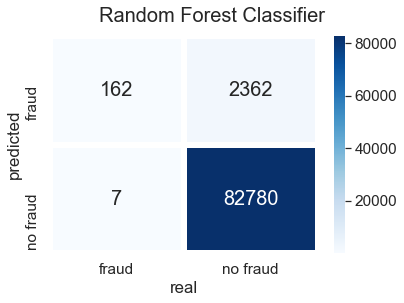

In [52]:
show_model_results("Random Forest Classifier", y_pred_rfc2, y_test)

Recall has improved a lot, but we see the effect of undersampling in the bad score of precision. After undesampling, we have so few observations from Class "0" that this models are wrongly classifying a lot of "No fraud" as "Fraud"

### OVERSAMPLING SMOTE
(using all available data to oversample) 
Note: Be carefull with overfitting in this case, as we are replicating exact data points
SMOTE = Synthetic Minority Oversampling Technique. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line

In [53]:
X_smote, y_smote = SMOTE().fit_sample(X,y)

In [54]:
y_smote["Class"].value_counts()

1    283875
0    283875
Name: Class, dtype: int64

In [55]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_smote,y_smote,test_size=0.3, random_state=23)

In [56]:
# instanciating linear regression model
lr3 = LogisticRegression(solver="liblinear")

# training the model
lr3.fit(X_train3, y_train3.values.ravel())

# making predictions
y_pred_lr3 = lr3.predict(X_test) #using original X_test to predict

In [57]:
# instanciating random forest classifier
rfc3 = RandomForestClassifier(n_estimators = 10)

# training the model
rfc3.fit(X_train3, y_train3.values.ravel())

# making predictions
y_pred_rfc3 = rfc3.predict(X_test) #using original X_test to predict

__________________________________________________________
PERFORMANCE OF MODEL = Linear Regression
__________________________________________________________
Accuracy of the model = 0.975
Precision of the model = 0.069
Recall of the model = 0.923
f1 score of the model = 0.129


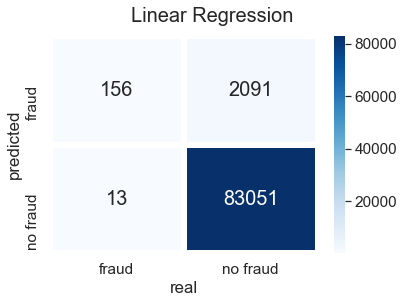

In [58]:
show_model_results("Linear Regression", y_pred_lr3, y_test)

__________________________________________________________
PERFORMANCE OF MODEL = Random Forest Classifier
__________________________________________________________
Accuracy of the model = 1.0
Precision of the model = 0.939
Recall of the model = 0.994
f1 score of the model = 0.966


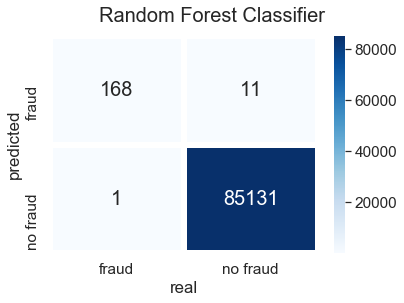

In [59]:
show_model_results("Random Forest Classifier", y_pred_rfc3, y_test)

Looks like we have, with the Random forest Classifier, a good model, something overfitted though. Let's work on that later with the StratifiedKFold validation.

### OVERSAMPLING SMOTE WITH KFOLD
(using stratified samples of data to oversample with SMOTE)

In [60]:
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=1) # using 4 splits

***********************************************
>Train: 0=212906, 1=369, Test: 0=70969, 1=123
425812
425812
__________________________________________________________
PERFORMANCE OF MODEL = Linear Regression
__________________________________________________________
Accuracy of the model = 0.976
Precision of the model = 0.062
Recall of the model = 0.886
f1 score of the model = 0.115
__________________________________________________________
PERFORMANCE OF MODEL = Random Forest Classifier
__________________________________________________________
Accuracy of the model = 0.999
Precision of the model = 0.866
Recall of the model = 0.789
f1 score of the model = 0.826
***********************************************
>Train: 0=212906, 1=369, Test: 0=70969, 1=123
425812
425812
__________________________________________________________
PERFORMANCE OF MODEL = Linear Regression
__________________________________________________________
Accuracy of the model = 0.974
Precision of the model = 0.059
R

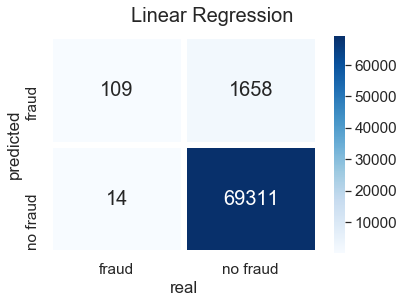

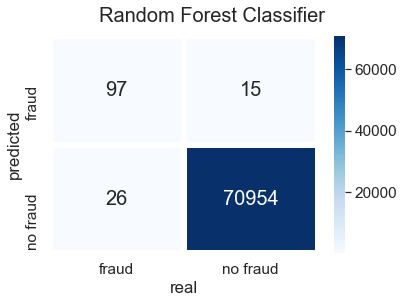

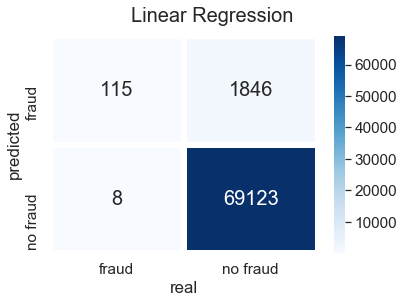

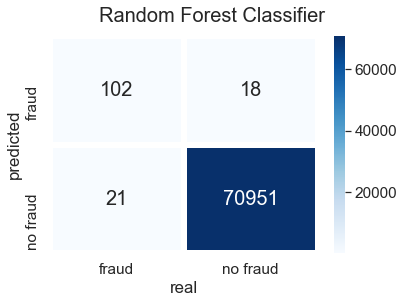

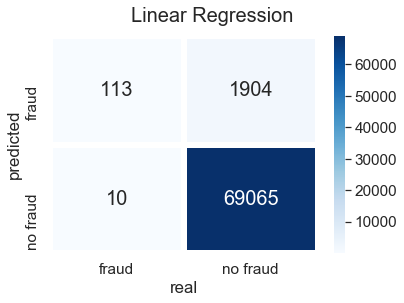

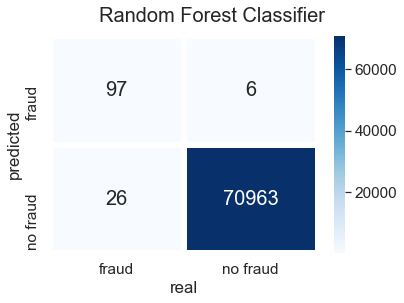

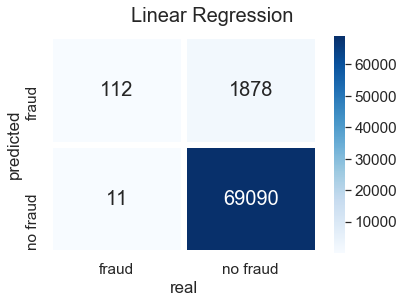

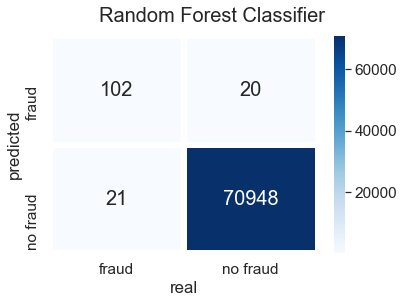

In [61]:
# creating a for loop to run k-folds over X and y, SMOTE and models

algorithms_lr=[] #initializing container
algorithms_rfc=[] #initializing container


for train_ix, test_ix in kfold.split(X, y):
    print("***********************************************")
    train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
    
    train_0, train_1 = len(train_y[train_y["Class"]==0]),len(train_y[train_y["Class"]==1])
    test_0, test_1 = len(test_y[test_y["Class"]==0]),len(test_y[test_y["Class"]==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1)) 
    
    X_smote, y_smote = SMOTE(sampling_strategy='minority').fit_sample(train_X,train_y)
    print(len(X_smote))
    print(len(y_smote)) 

    
    lr4 = LogisticRegression(solver="liblinear")
    lr4.fit(X_smote, y_smote.values.ravel())
    algorithms_lr.append(lr4)
    y_pred_lr4= lr4.predict(test_X)

    rfc4 = RandomForestClassifier(n_estimators=10) 
    rfc4.fit(X_smote, y_smote.values.ravel()) 
    algorithms_rfc.append(rfc4)
    y_pred_rfc4 = rfc4.predict(test_X) 
    
    show_model_results("Linear Regression", y_pred_lr4, test_y)
    show_model_results("Random Forest Classifier", y_pred_rfc4, test_y)

In [62]:
algorithms_lr

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=

In [63]:
algorithms_rfc

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                 

### Plotting precision_recall curve for the model

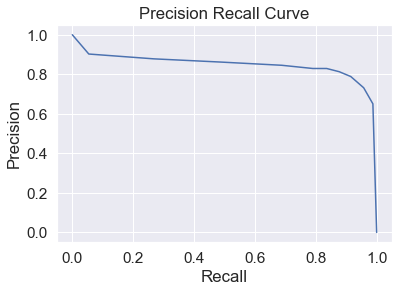

In [64]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rfc4.predict_proba(test_X)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(test_y, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

__________________________

## CONCLUSIONS: 
- We ended with a pretty good model for detecting fraud in bank transactions  using Random Forest Classifier and SMOTE KFOLD oversampling, but this model is built under a specific Kfold split.
- Future work: Try applying Regular SMOTE with Stratified Sampling, and applyting a single Random Forest Classifier with CrossValidation using KFold, and check mean of performances of that model for each Kfold.